In [1]:
import sys
from pathlib import Path, PureWindowsPath
current_folder = PureWindowsPath(globals()['_dh'][0]).as_posix()
path_root = "/".join(current_folder.split("/")[:-3]) #remonter au dossier root du projet
os.chdir(path_root)
print(os.getcwd())
sys.path.append(os.getcwd() + "/sources/classification/")

c:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_bapteme_philo


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from gensim.utils import tokenize
from pathlib import Path, PureWindowsPath
from lib_classification import *
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', None) #afficher texte entier dans dataframe

In [3]:
path = PureWindowsPath(os.getcwd() + "/data/input/data_philosophy_baptism.parquet")
path = path.as_posix() #convertir en path linux (convertir les \\ en /)
corpus = pd.read_parquet(path) #engine="fastparquet"
corpus = get_balanced_binary_dataset(corpus, class_col_name="category")

print(corpus["category_bin"].value_counts())
print("presence de doublons ?")
print(corpus.id.duplicated().any())
print(corpus.index.duplicated().any())
corpus

0    1833
1    1833
Name: category_bin, dtype: int64
presence de doublons ?
False
False


,id,message,message_preprocessed,category,length,category_bin
0,0,Commentary on the Heidelberg Catechism – Zacharias Ursinus : Un classique,commentary the heidelberg catechism – zacharias ursinus classique,baptism,73,0
1,1,"Par ailleurs, même l’expression « croire avec sa maison », en ayant l’arrière plan de l’usage de cette formule en tête, ne doit très probablement pas être lue avec un présupposé credobaptiste et individualiste. Comme le dit Greg Strawbridge : « Ainsi, l’objection évoquée « mais tous les membres de la famille ont cru, » n’est pas convaincante aux yeux de celui qui considère les particularités exégétiques des deux cas où il est question d’une maison croyante (16 :31-34 et 18 :8). Nous devons ici oublier les présupposés de notre culture individualiste et considérer, avec l’arrière-plan biblique en tête, s’il est plus probable de lire ces textes avec la compréhension individualiste (tous les individus ont cru) ou avec une compréhension familiale et alliancielle (les membres de la famille ont suivi le chef de famille selon leur capacité) […] Dans le cas du geôlier (16 :31-34) et de Crispus (18 :8), le grec utilise un verbe au singulier, non pas au pluriel, pour décrire l’acte de croire. Ces textes ne disent pas que le geôlier (ou Crispus) et ( _kai_ ) sa maison ont cru (au pluriel). Luc aurait pu utiliser cela pour indiquer que chaque individu a cru. Au contraire, ces textes enseignent, comme l’aurait attendu toute personne familière avec l’Ancien Testament que le geôlier, la tête de la famille, se « réjouit (singulier) beaucoup, avec sa maison ( _panoikei_ , un adverbe), ayant cru (participe au singulier, _pepisteukos_ ) en Dieu » (Actes 16 :34) ; et Crispus, la tête de famille « crut (verbe singulier, _episteusen_ ) au Seigneur avec ( _sūn_ ) toute sa famille » (18 :8). Toutefois, nous voyons que Luc procède différemment quand il parle des baptêmes administrés où il précise cette fois- ci que chaque membre de la famille du geôlier le reçoit : « il fut baptisé, lui et ( _kai_ ) toute sa famille » (16 :33). »",ailleurs expression « croire maison » arrière plan usage cette formule tête doit très probablement être lue présupposé credobaptiste individualiste comme dit greg strawbridge « ainsi objection évoquée « tous membre famille cru » convaincante yeux celui considère particularité exégétiques deux cas où question maison croyant - devon ici oublier présupposé culture individualiste considérer arrière-plan biblique tête plus probable lire texte compréhension individualiste tous individu cru compréhension familiale alliancielle membre famille suivi chef famille selon capacité … cas geôlier - crispus grec utilise verbe singulier non pluriel décrire acte croire texte disent geôlier crispus kai maison cru pluriel luc pu utiliser cela indiquer chaque individu a cru contraire texte enseignent comme attendu toute personne familier ancien testament geôlier tête famille « réjouit singulier beaucoup maison panoikei adverbe cru participe singulier pepisteukos dieu » acte crispus tête famille « crut verbe singulier episteusen seigneur sūn toute famille » toutefois voyons luc procède différemment quand parle baptême administré où précise cette fois- ci chaque membre famille geôlier reçoit « baptisé kai toute famille » »,baptism,1837,0
...,...,...,...,...,...,...
3664,3664,## Article 8: La science de Dieu est-elle cause des choses?,article science dieu est-elle cause chose,philosophy,59,1
3665,3665,**L’union du Logos incarné s’est-t-elle faite dans le suppôt ou hypostase ? Oui.**,lunion logo incarné est-t-elle faite suppôt hypostase oui,philosophy,82,1


In [4]:
X = corpus["message_preprocessed"]
y = corpus["category"]
# y = corpus["category_bin"]
indices = corpus["id"]
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.33, random_state=42)

In [5]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


In [6]:
tokens = corpus["message_preprocessed"].apply(word_tokenize)
model = Word2Vec(sentences=tokens, vector_size=200,workers=-1, sg=0) #modele skip-gram

In [7]:
tokens

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     [commentary, the, heidelberg, catechism, –, zacharias, ursinus, classique]
1       [ailleurs, expression, «, croire, maison, », arrière, plan, usage, cette, formule, tête, doit, très, probablement, être, lue, présupposé, credobaptiste, indivi

In [10]:
words_vectors = model.wv

In [13]:
model.wv.most_similar("maxime", topn=10)

[('mémoire', 0.26893195509910583),
 ('perspective', 0.2568460702896118),
 ('comment', 0.2226698398590088),
 ('hypostatique', 0.21855299174785614),
 ('accomplissement', 0.21523335576057434),
 ('accessible', 0.2086881846189499),
 ('compréhension', 0.2060597687959671),
 ('relire', 0.20239178836345673),
 ('elles', 0.19563530385494232),
 ('départ', 0.18949609994888306)]

In [8]:
vocab=list(model.wv.key_to_index.keys())
print(len(vocab))

2924


In [81]:
type(model.wv)
model.wv[0]
model.wv[0].shape

(200,)

In [11]:
model.wv.key_to_index
model.wv.index_to_key[100]
type(model.wv.index_to_key)

list

In [123]:
len(model.wv.index_to_key)

2924

In [124]:
type(model.wv)

gensim.models.keyedvectors.KeyedVectors

In [12]:
len(words_vectors)
len(words_vectors.index_to_key[:len(words_vectors)])
type(words_vectors[words_vectors.index_to_key[:len(words_vectors)]])
words_vectors[words_vectors.index_to_key[:len(words_vectors)]].shape

(2924, 200)

In [10]:
words_vectors[words_vectors.index_to_key[:len(words_vectors)]]

NameError: name 'words_vectors' is not defined

In [13]:
#TSNE en 2D apres reduction svd en 50 dimensions
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=30, verbose=1)
tsne_results = tsne.fit_transform(words_vectors[words_vectors.index_to_key[:len(words_vectors)]])
tsne_results

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2924 samples in 0.001s...
[t-SNE] Computed neighbors for 2924 samples in 0.378s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2924
[t-SNE] Computed conditional probabilities for sample 2000 / 2924
[t-SNE] Computed conditional probabilities for sample 2924 / 2924
[t-SNE] Mean sigma: 0.008756
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.477570
[t-SNE] KL divergence after 900 iterations: 3.742531


array([[ 32.97364  ,   1.2497454,   1.1420145],
       [ 27.86875  ,  -2.8143344,  35.80869  ],
       [  2.6578183,   8.4970455,  18.559544 ],
       ...,
       [ 22.212584 , -10.845288 ,   6.9894176],
       [-22.084402 ,  29.242697 ,  -2.2913356],
       [-20.833311 ,  13.64799  , -23.708496 ]], dtype=float32)

In [152]:
tsne_results.shape
# tsne_results[:,0].shape
# tsne_results[:,1].shape

(2924, 2)

In [174]:
#Plot 3D
import plotly.express as px
fig = px.scatter_3d(corpus, x=tsne_results[0:50:,0], y=tsne_results[0:50:,1], z=tsne_results[0:50:,2],
              text=words_vectors.index_to_key)
fig.show()

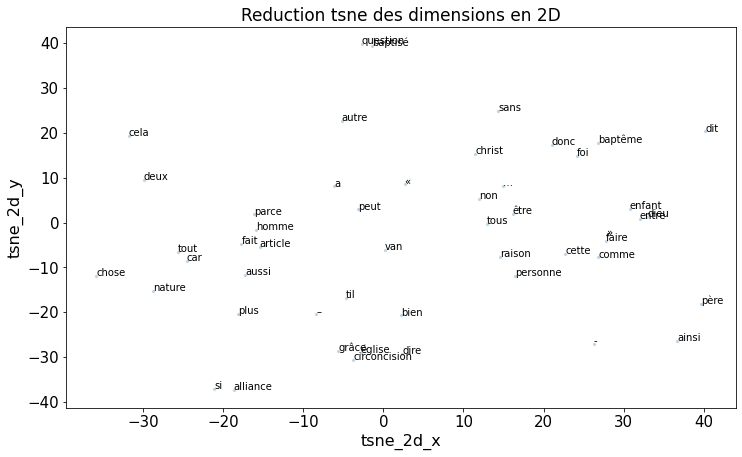

In [14]:
# Sans label
plt.figure(figsize=(12, 7))
sb.scatterplot(
    x=tsne_results[0:50:,0], y=tsne_results[0:50:,1],
    legend="auto",
    alpha=0.3,
    s=10
)
for i in range(50):
    plt.text(x=tsne_results[i,0], y=tsne_results[i,1], s=words_vectors.index_to_key[i])

plt.xlabel("tsne_2d_x", size=16)
plt.ylabel("tsne_2d_y", size=16)
plt.title("Reduction tsne des dimensions en 2D", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [15]:
print(tsne_results[0:50:,0])

array([ 32.97364   ,  27.86875   ,   2.6578183 ,  -6.156161  ,
        26.759222  ,  26.850883  ,  16.1331    , -18.113335  ,
       -18.714615  ,  22.738516  , -17.732666  ,  30.788158  ,
       -21.100252  ,  21.00191   ,  40.18455   , -25.64658   ,
        11.441761  ,  26.25866   ,  -8.396498  ,  24.155148  ,
         2.2062364 , -35.837776  , -31.808994  ,  -3.1559381 ,
       -15.883595  ,  11.889427  ,   0.16937323, -17.269344  ,
        -4.664543  ,   2.3588793 , -15.474083  ,  14.938675  ,
        12.966424  ,  36.691887  ,  32.03494   , -28.764671  ,
        14.556421  ,  -5.2187657 , -16.172247  ,  -2.6972094 ,
       -24.54941   ,  39.68088   ,  -3.7747867 ,  27.805323  ,
        16.432642  ,  -5.650859  ,  14.336708  ,  -2.8012807 ,
        -1.4311023 , -29.907084  ], dtype=float32)

sources :
http://ethen8181.github.io/machine-learning/keras/text_classification/word2vec_text_classification.html